In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift
import warnings
warnings.simplefilter('ignore')

In [2]:
ax = 20000
ay = 20000
dx = 2000
dy = 2000
X = np.arange(-250000,250000+dx,dx)
Y = np.arange(-250000,250000+dx,dy)
X_2d, Y_2d = np.meshgrid(X, Y)
Lx = 500000
Ly = 500000
Nx = Lx/dx
Ny = Ly/dy
m = 6
g = 9.81
H = 100
dt = 5
t = np.arange(0,3601,dt)

In [3]:
k=2*np.pi*fftshift(np.fft.fftfreq(len(X), dx))
l=2*np.pi*fftshift(np.fft.fftfreq(len(Y), dy))
k_2d, l_2d = np.meshgrid(k,l)
w = np.sqrt(g*H*(k_2d**2+l_2d**2))

In [4]:
fxy = np.exp(-(X_2d / ax) ** m) * np.exp(-(Y_2d / ay) ** m)
ffxy = fftshift(fft2(fxy))

In [5]:
Time_step = [0,3000,3600]
FEta_timestep = np.zeros((3,len(X),len(Y)))
Eta = np.zeros((3,len(X),len(Y)))
for i in range(3):
    FEta_timestep[i] = ffxy*np.cos(w*Time_step[i])
    Eta[i] = np.real(ifft2(ifftshift(FEta_timestep[i])))

In [6]:
Eta[1]

array([[ 2.71794050e-17,  2.86278256e-17, -7.81682876e-18, ...,
        -9.66147602e-18, -7.81682876e-18,  2.86278256e-17],
       [ 7.68374822e-18,  8.90357109e-18, -2.15964918e-17, ...,
        -2.01548804e-17, -2.65859386e-17,  8.24277179e-18],
       [ 7.54376234e-18,  1.79914556e-17, -2.50476461e-17, ...,
        -2.34755190e-17, -1.38451387e-17,  4.37726162e-18],
       ...,
       [ 2.09996669e-17,  2.38767967e-17, -1.03625600e-17, ...,
        -1.53630963e-17,  1.47173170e-18,  2.34558480e-17],
       [ 7.54376234e-18,  4.37726162e-18, -1.38451387e-17, ...,
        -5.79854917e-18, -2.50476461e-17,  1.79914556e-17],
       [ 7.68374822e-18,  8.24277179e-18, -2.65859386e-17, ...,
        -2.84857440e-17, -2.15964918e-17,  8.90357109e-18]])

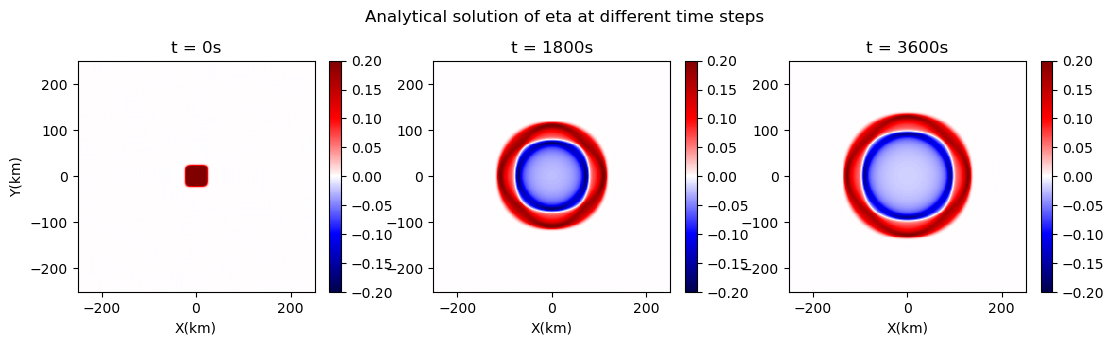

In [7]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, Eta[0], cmap='seismic', vmin=-0.2, vmax=0.2)
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,3,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, Eta[1], cmap='seismic', vmin=-0.2, vmax=0.2)
ax2.set_title("t = 1800s")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)
ax3 = fig.add_subplot(1,3,3)
cb3 = ax3.pcolormesh(X/1e3, Y/1e3, Eta[2], cmap='seismic', vmin=-0.2, vmax=0.2)
ax3.set_title("t = 3600s")
ax3.set_xlabel("X(km)")
fig.colorbar(cb3,ax = ax3)
plt.suptitle('Analytical solution of eta at different time steps',y = 1.05)
plt.show()

In [8]:
########Numerical solution

In [9]:
eta_FD = np.zeros((len(X), len(Y), len(t)))
eta_FD[:, :, 0] = fxy
eta_FD[:, :, 1] = fxy

In [10]:
CFL_x = np.sqrt(g*H)*dt/dx

In [11]:
for n in range(1, len(t)-1):
    for i in range(1, len(X)-1):
        for j in range(1, len(Y)-1):
            eta_FD[i,j, n+1] = 2 * eta_FD[i, j, n] - eta_FD[i,j, n-1] + CFL_x**2 * (eta_FD[i+1, j,n] + eta_FD[i-1, j,n] - 2 * eta_FD[i,j, n]) + CFL_x**2 * (eta_FD[i, j+1 ,n] + eta_FD[i, j-1 ,n] - 2 * eta_FD[i, j, n])

In [12]:
eta_FD

array([[[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         2.42987995e-154, 4.38885579e-

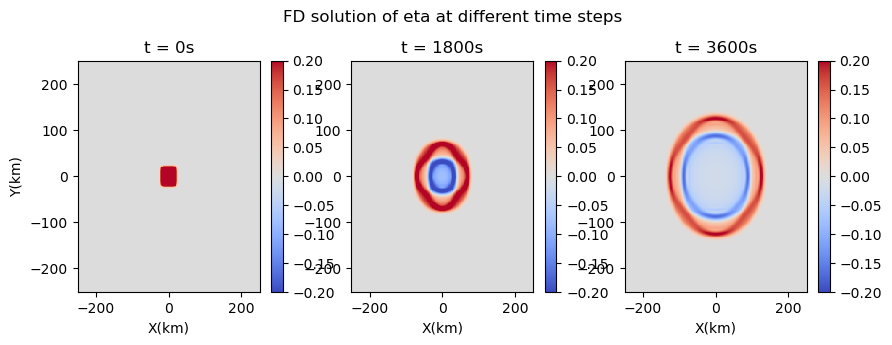

In [13]:
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,0], cmap='coolwarm',vmin=-0.2, vmax=0.2)
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,3,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,int(1800/dt)], cmap='coolwarm',vmin=-0.2, vmax=0.2)
ax2.set_title("t = 1800s")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)
ax3 = fig.add_subplot(1,3,3)
cb3 = ax3.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,int(3600/dt)], cmap='coolwarm', vmin=-0.2, vmax=0.2)
ax3.set_title("t = 3600s")
ax3.set_xlabel("X(km)")
fig.colorbar(cb3,ax = ax3)
plt.suptitle('FD solution of eta at different time steps',y = 1.05)
plt.show()

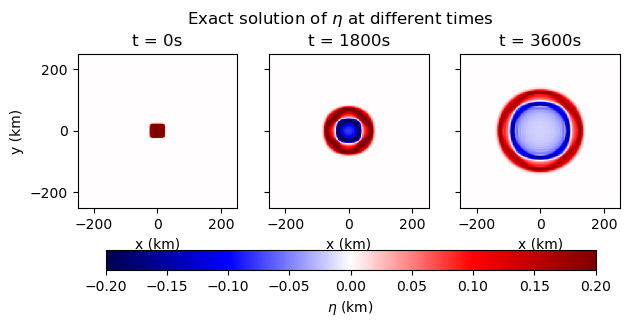

In [14]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7, 2), sharey=True)
time_step=[0,1800,3600]
for i, t in enumerate(time_step):
    color_plot = axs[i].pcolormesh(X / 1e3, Y / 1e3, eta_FD[:,:, int(t/dt)], 
                                   cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$ (km)')
plt.suptitle('Exact solution of $\eta$ at different times', y=1.1)
plt.show()

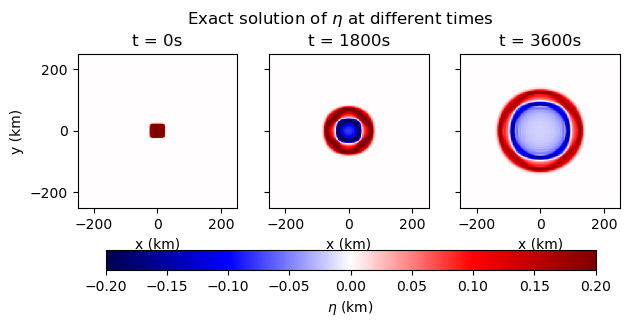

In [15]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7, 2), sharey=True)
time_step=[0,1800,3600]
for i, t in enumerate(time_step):
    color_plot = axs[i].pcolormesh(X / 1e3, Y / 1e3, eta_FD[:,:, int(t/dt)], 
                                   cmap='seismic', vmin=-0.2, vmax=0.2)
    axs[i].set_title(f't = {t}s')
    axs[i].set_xlabel('x (km)')
    if i == 0:
        axs[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal', label='$\eta$ (km)')
plt.suptitle('Exact solution of $\eta$ at different times', y=1.1)
plt.show()

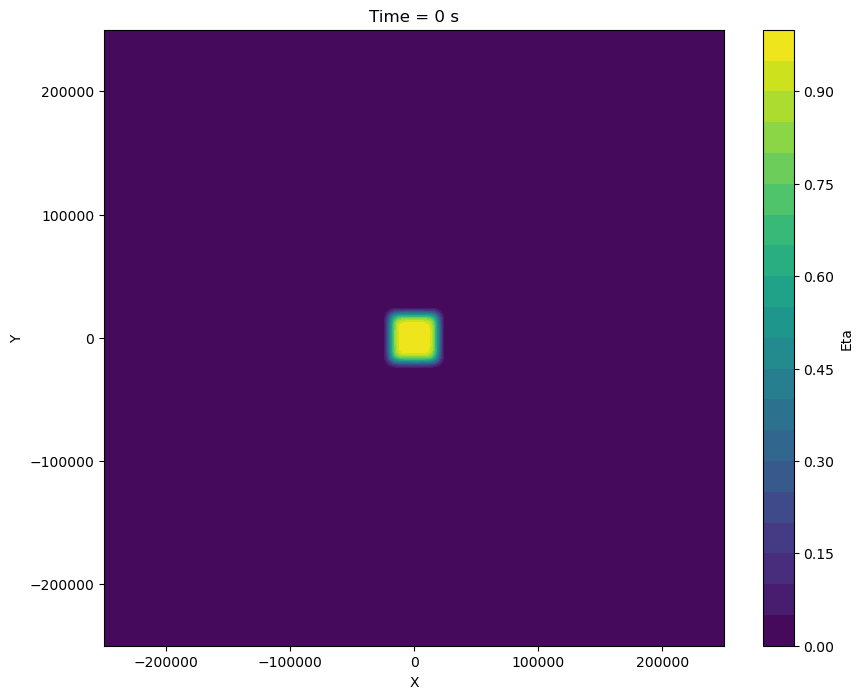

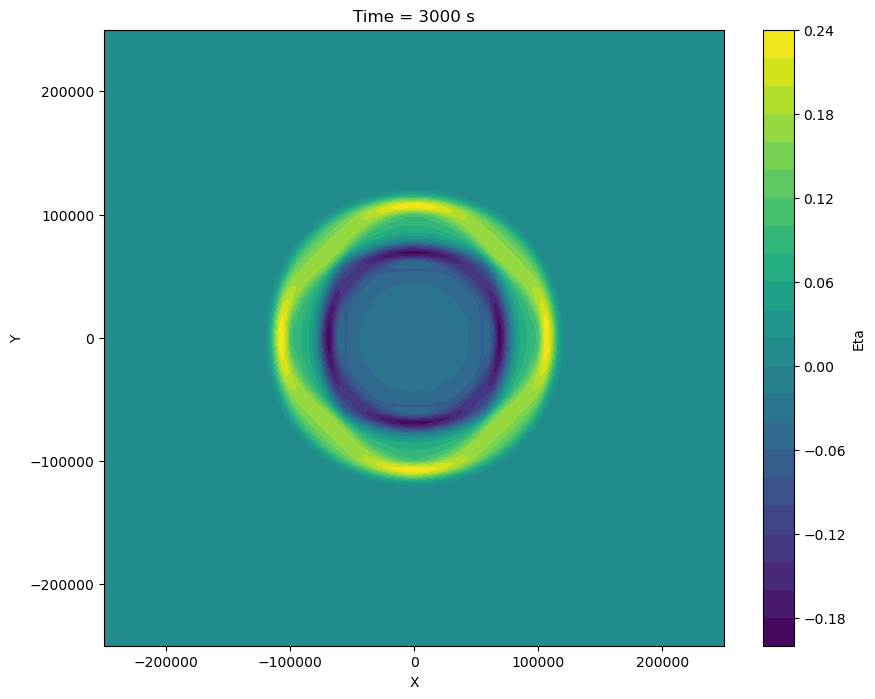

In [16]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# [Your provided code here]

def plot_at_times(times, data, dt):
    for time in times:
        index = int(time / dt)
        if index < data.shape[2]:
            plt.figure(figsize=(10, 8))
            plt.contourf(X_2d, Y_2d, eta_FD[:, :, index], cmap='viridis', levels=20)
            plt.title(f"Time = {time} s")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.colorbar(label="Eta")
            plt.show()
        else:
            print(f"Time {time} s is out of the range of the data provided.")

plot_at_times([0, 3000], eta_FD, dt)


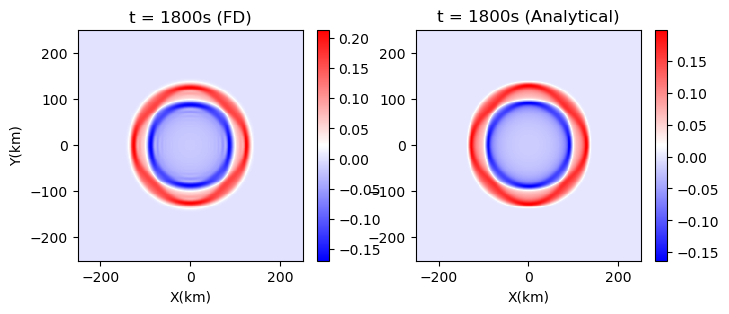

In [17]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(1,2,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,-1], cmap='bwr')
ax1.set_title("t = 1800s (FD)")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,2,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, Eta[2], cmap='bwr')
ax2.set_title("t = 1800s (Analytical)")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)

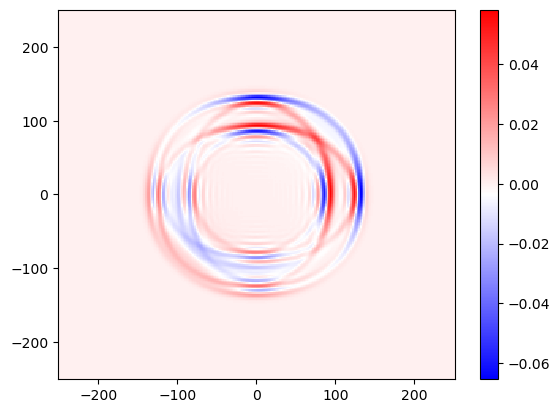

In [18]:

plt.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,-1]-Eta[2], cmap='bwr')
plt.colorbar()

In [19]:
print(X)

[-250000 -248000 -246000 -244000 -242000 -240000 -238000 -236000 -234000
 -232000 -230000 -228000 -226000 -224000 -222000 -220000 -218000 -216000
 -214000 -212000 -210000 -208000 -206000 -204000 -202000 -200000 -198000
 -196000 -194000 -192000 -190000 -188000 -186000 -184000 -182000 -180000
 -178000 -176000 -174000 -172000 -170000 -168000 -166000 -164000 -162000
 -160000 -158000 -156000 -154000 -152000 -150000 -148000 -146000 -144000
 -142000 -140000 -138000 -136000 -134000 -132000 -130000 -128000 -126000
 -124000 -122000 -120000 -118000 -116000 -114000 -112000 -110000 -108000
 -106000 -104000 -102000 -100000  -98000  -96000  -94000  -92000  -90000
  -88000  -86000  -84000  -82000  -80000  -78000  -76000  -74000  -72000
  -70000  -68000  -66000  -64000  -62000  -60000  -58000  -56000  -54000
  -52000  -50000  -48000  -46000  -44000  -42000  -40000  -38000  -36000
  -34000  -32000  -30000  -28000  -26000  -24000  -22000  -20000  -18000
  -16000  -14000  -12000  -10000   -8000   -6000   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt

# Parameters
Lx, Ly = 500, 500
H = 100
ax, ay = 20, 20
m = 2
dx, dy = 2, 2
g = 9.81
c = sqrt(g * H)
dt = dx / (c * sqrt(2))

nx, ny = int(Lx / dx) + 1, int(Ly / dy) + 1
nt = int(3600 / dt) + 1
x = np.linspace(-250, 250, nx)
y = np.linspace(-250, 250, ny)

# Initial condition
def f(x, y):
    return exp((x / ax) ** m) * exp((y / ay) ** m)

phi = np.zeros((nx, ny, nt))
for i in range(nx):
    for j in range(ny):
        phi[i, j, 0] = f(x[i], y[j])

# Leapfrog centered in space and time
for n in range(1, nt - 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            phi[i, j, n + 1] = 2 * phi[i, j, n] - phi[i, j, n - 1] + c**2 * dt**2 * (
                (phi[i + 1, j, n] - 2 * phi[i, j, n] + phi[i - 1, j, n]) / dx**2
                + (phi[i, j + 1, n] - 2 * phi[i, j, n] + phi[i, j - 1, n]) / dy**2
            )

# Plot the numerical solution
def plot_solution(t_index, title):
    plt.imshow(phi[:, :, t_index].T, origin="lower", extent=(-250, 250, -250, 250), cmap="viridis")
    plt.colorbar(label="Amplitude")
    plt.xlabel("x (km)")
    plt.ylabel("y (km)")
    plt.title(title)
    plt.show()

plot_solution(0, "t = 0 s")
plot_solution(int(1800 / dt), "t = 1800 s")
plot_solution(int(3600 / dt), "t = 3600 s")


In [ ]:
def FDCS_AN(dx,dy,dt,m,fxy,X,Y,g=9.81,H =100):
    
    T = int(3600/dt)
    T_var = np.arange(0,3601,dt)
    
    Eta_ana = np.zeros((T,len(X),len(Y)))
    FEta_ts = np.zeros((T,len(X),len(Y)))
    for i in range(T):
        FEta_ts[i] = ffxy*np.cos(w*T_var[i])
        Eta_ana[i] = np.real(ifft2(ifftshift(FEta_ts[i])))
    
    CFL_x = np.sqrt(g*H)*dt/dx
    CFL_y = np.sqrt(g*H)*dt/dy

    
    eta_FD = np.zeros((len(X), len(Y), T))
    eta_FD[:, :, 0] = Eta_ana[0]
    eta_FD[:, :, 1] = Eta_ana[0]
    for n in range(1, T-1):
        for i in range(1, len(X)-1):
            for j in range(1, len(Y)-1):
                eta_FD[i,j, n+1] = 2 * eta_FD[i, j, n] - eta_FD[i,j, n-1] + CFL_x**2 * (eta_FD[i+1, j,n] + eta_FD[i-1, j,n] - 2 * eta_FD[i,j, n]) + CFL_y**2 * (eta_FD[i, j+1 ,n] + eta_FD[i, j-1 ,n] - 2 * eta_FD[i, j, n])
    return Eta_ana, eta_FD

m1 = 2
fxy = np.exp(-(X_2d / ax) * m1) * np.exp(-(Y_2d / ay) * m1)
dt_var = [5,15,30,40]
Eta_ana_30 , eta_FD_30 = FDCS_AN(dx,dy,5,m1,fxy,X,Y,g=9.81,H =100)


In [ ]:
Eta_ana_30.shape

In [ ]:
T_30 = int(3600/10)
T30 = np.arange(0,3600,10)
l2_30 = np.zeros(T_30)
for i in range(T_30):
    l2_30[i] = np.sqrt(np.sum((eta_FD_30[:,:,i]-Eta_ana_30[i])**2))
plt.pcolormesh(l2_30)


In [ ]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,0], cmap='coolwarm')
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")
fig.colorbar(cb1,ax = ax1)
ax2 = fig.add_subplot(1,3,2)
cb2 = ax2.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,1800], cmap='coolwarm')
ax2.set_title("t = 1800s")
ax2.set_xlabel("X(km)")
fig.colorbar(cb2,ax = ax2)
ax3 = fig.add_subplot(1,3,3)
cb3 = ax3.pcolormesh(X/1e3, Y/1e3, eta_FD[:,:,3600], cmap='coolwarm')
ax3.set_title("t = 3600s")
ax3.set_xlabel("X(km)")
fig.colorbar(cb3,ax = ax3)
plt.suptitle('FD solution of eta at different time steps',y = 1.05)
plt.show()

In [ ]:
Eta_ana_30.shape

In [ ]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1,3,1)
cb1 = ax1.pcolormesh(X/1e3, Y/1e3, Eta_ana_30[71], cmap='coolwarm', vmin=-0.2, vmax=0.2)
ax1.set_title("t = 0s")
ax1.set_xlabel("X(km)")
ax1.set_ylabel("Y(km)")

In [ ]:
def FDCS_AN(dx,dy,dt,m,ffxy,X,Y,g=9.81,H =100):
    
    T = int(3600/dt)
    T_var = np.arange(0,3601,dt)
    
    Eta_ana = np.zeros((T,len(X),len(Y)))
    FEta_ts = np.zeros((T,len(X),len(Y)))
    for i in range(T):
        FEta_ts[i] = ffxy*np.cos(w*T_var[i])
        Eta_ana[i] = np.real(ifft2(ifftshift(FEta_ts[i])))
    
    CFL_x = np.sqrt(g*H)*dt/dx
    CFL_y = np.sqrt(g*H)*dt/dy

    
    eta_FD = np.zeros((len(X), len(Y), T))
    eta_FD[:, :, 0] = Eta_ana[0]
    eta_FD[:, :, 1] = Eta_ana[0]
    for n in range(1, T-1):
        for i in range(1, len(X)-1):
            for j in range(1, len(Y)-1):
                eta_FD[i,j, n+1] = 2 * eta_FD[i, j, n] - eta_FD[i,j, n-1] + CFL_x**2 * (eta_FD[i+1, j,n] + eta_FD[i-1, j,n] - 2 * eta_FD[i,j, n]) + CFL_y**2 * (eta_FD[i, j+1 ,n] + eta_FD[i, j-1 ,n] - 2 * eta_FD[i, j, n])
    return Eta_ana, eta_FD
m1 = 2
m2 = 6
fxy = np.exp(-(x_grid / ax) * m1) * np.exp(-(y_grid / ay) * m1)
ffxy = fftshift(fft2(fxy))
dt_var = [5,15,30,40]
Eta_ana_5 , eta_FD_5 = FDCS_AN(dx,dy,5,m1,ffxy,X,Y,g=9.81,H =100)
Eta_ana_20 , eta_FD_20 = FDCS_AN(dx,dy,20,m1,ffxy,X,Y,g=9.81,H =100)
Eta_ana_35 , eta_FD_35 = FDCS_AN(dx,dy,35,m1,ffxy,X,Y,g=9.81,H =100)
Eta_ana_50 , eta_FD_50 = FDCS_AN(dx,dy,50,m1,ffxy,X,Y,g=9.81,H =100)
Eta_ana_65 , eta_FD_65 = FDCS_AN(dx,dy,65,m1,ffxy,X,Y,g=9.81,H =100)

Eta_ana_5_ , eta_FD_5_ = FDCS_AN(dx,dy,5,m2,ffxy,X,Y,g=9.81,H =100)
Eta_ana_20_ , eta_FD_65_ = FDCS_AN(dx,dy,20,m2,ffxy,X,Y,g=9.81,H =100)
Eta_ana_35_ , eta_FD_35_ = FDCS_AN(dx,dy,35,m2,ffxy,X,Y,g=9.81,H =100)
Eta_ana_50_ , eta_FD_50_ = FDCS_AN(dx,dy,50,m2,ffxy,X,Y,g=9.81,H =100)
Eta_ana_65_ , eta_FD_65_ = FDCS_AN(dx,dy,65,m2,ffxy,X,Y,g=9.81,H =100)


In [ ]:
eta_FD_20.shape

In [ ]:
def l2_norm_error(dt, eta_FD, Eta_ana):
    T_steps = np.arange(0, 3600, dt)
    l2_error = np.zeros(len(T_steps))
    
    for i in range(min(eta_FD.shape[2], Eta_ana.shape[0])):
        l2_error[i] = np.sqrt(np.sum((eta_FD[:, :, i] - Eta_ana[i]) ** 2))
    
    return l2_error

# Compute L2 norm errors for each dt value
l2_error_5 = l2_norm_error(5, eta_FD_5, Eta_ana_5)
l2_error_20 = l2_norm_error(20, eta_FD_20, Eta_ana_20)
l2_error_35 = l2_norm_error(35, eta_FD_35, Eta_ana_35)
l2_error_50 = l2_norm_error(50, eta_FD_50, Eta_ana_50)
l2_error_65 = l2_norm_error(65, eta_FD_65, Eta_ana_65)

# Plot L2 norm errors for each dt value
plt.figure()
plt.plot(np.arange(0, 3600, 5), l2_error_5, label='dt = 5')
plt.plot(np.arange(0, 3600, 20), l2_error_20, label='dt = 20')
plt.plot(np.arange(0, 3600, 35), l2_error_35, label='dt = 35')
#plt.plot(np.arange(0, 3600, 50), l2_error_50, label='dt = 50')
#plt.plot(np.arange(0, 3600, 65), l2_error_65, label='dt = 65')

plt.xlabel('Time (s)')
plt.ylabel('L2 Norm Error')
plt.title('L2 Norm Error for Different dt Values')
plt.legend()
plt.show()
